### Loading data

Below we have the code that retrieves the data from the  Mechanical Turk Tracker Demographics API.

In [1]:
import pandas as pd
df = pd.read_csv("mturk_surveys.csv")
df.drop(df.columns[0], axis=1, inplace=True) # drop the "index" column
# We now transform our API answer into a flat table
# and set the right data types
df["hit_answered_date"]=pd.to_datetime(df["hit_answered_date"])
df["hit_creation_date"]=pd.to_datetime(df["hit_creation_date"])
df["household_income"]=df["household_income"].astype("category")
df["household_size"]=df["household_size"].astype("category")
df["location_country"]=df["location_country"].astype("category")
df["marital_status"]=df["marital_status"].astype("category")
df['date'] = df['hit_answered_date'].apply(lambda x : x.date())
df['time'] = df['hit_answered_date'].apply(lambda x : x.time())
df.dtypes

gender                             object
hit_answered_date          datetime64[ns]
hit_creation_date          datetime64[ns]
household_income                 category
household_size                   category
location_city                      object
location_country                 category
location_region                    object
marital_status                   category
post_to_completion_secs           float64
worker_id                          object
year_of_birth                       int64
date                               object
time                               object
dtype: object

In [2]:
import datetime
minDate = min(df['hit_answered_date'])
maxDate = max(df['hit_answered_date'])
days = (maxDate - minDate).days
print(minDate)
print(maxDate)
print(days)

2015-03-26 11:47:28.877000
2018-02-08 19:19:56.215000
1050


In [3]:
from time import gmtime, strftime
def t():
    print(strftime("%Y-%m-%d %H:%M:%S", gmtime()))
    

### Exploratory plots

In [8]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
mpl.rc("figure", figsize=(16, 8))
mpl.rcParams.update({'font.size': 22})

### New Worker IDs discovered

In [26]:
def getWorkerIDs(df, startDate, endDate):
    '''
    Returns the set of distinct workers that participated in the surveys between the two dates
    '''
    workers = df["worker_id"][(df['hit_answered_date']>=startDate) & (df['hit_answered_date']<endDate)]
    unique = set(workers)
    return {
        "workers": len(workers),
        "unique": len(unique),
        "ratio": (len(unique) +0.5) / (len(workers) + 0.5),
        "start": startDate,
        "end": endDate
    }

In [27]:
dates = sorted(set(df['date']))

results = []
for d in dates:
    result = getWorkerIDs(df, minDate, d)
    results.append( result )

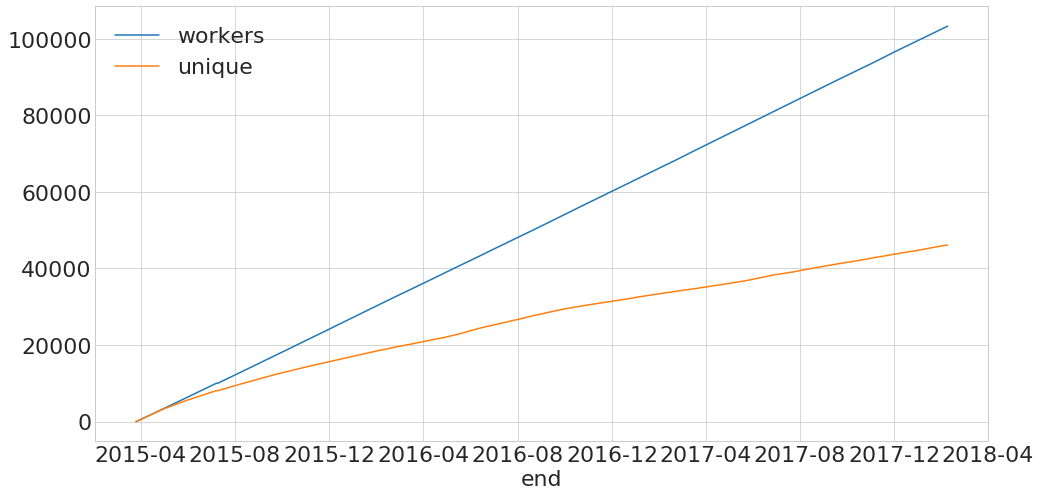

In [29]:
workers = pd.DataFrame(results)
workers.set_index('end', inplace = True)
workers[ ['workers', 'unique'] ].plot()

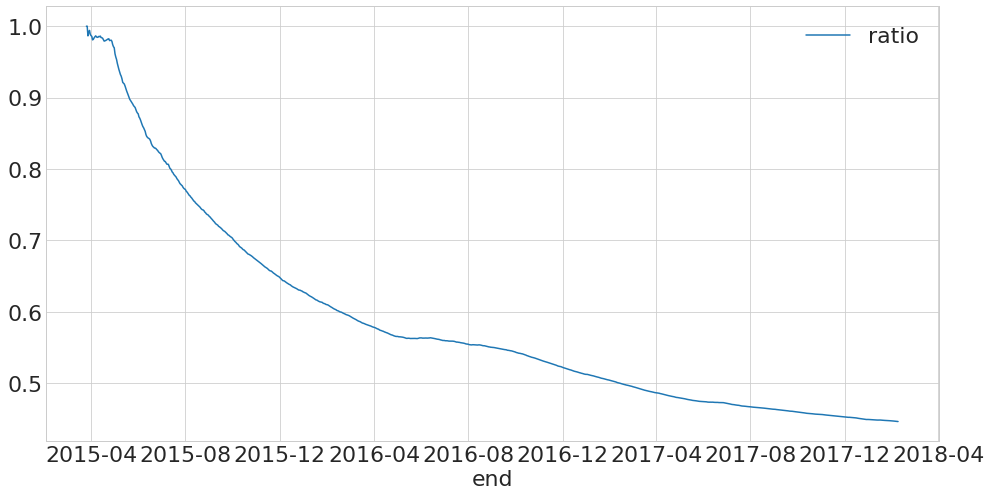

In [30]:
workers[ ['ratio'] ].plot()

### Selection bias

The analysis above indicated that we should expect to see around 10K-15K workers on Mechanical Turk, with an average half-life of around a year and a half. Over the last two years, this means around 35K-40K workers total. 

Out of these workers , every month, we survey around $24*4*30 \approx 3K$ workers, for a total of around 80K surveys so far.

If every worker had uniform chance of participating, we would have expected that on average we would see each worker twice.





In [9]:
len(df)

84511

,worker_id,gender,hit_answered_date,hit_creation_date,household_income,household_size,location_city,location_country,location_region,marital_status,post_to_completion_secs,year_of_birth,date,time
00008f60155d83e5ac29d6942db234e7,1,male,2017-03-04 12:19:22.415,2017-03-04 11:30:18,"$25,000-$39,999",1,nairobi,KE,?,single,2944.0,1995,2017-03-04,12:19:22.415000
0000ceeb6c91d4a1a53fec0de0cc3460,1,female,2015-05-19 10:14:33.288,2015-05-19 09:05:09,"$25,000-$39,999",1,winston-salem,US,nc,single,4164.0,1987,2015-05-19,10:14:33.288000
0001513be5c5e503366d994625ba169e,6,male,2017-05-22 09:45:35.285,2017-05-22 09:41:13,"$40,000-$59,999",3,chennai,IN,tn,single,262.0,1996,2017-05-22,09:45:35.285000
0001513be5c5e503366d994625ba169e,6,female,2017-04-22 04:44:28.231,2017-04-22 04:37:11,"$10,000-$14,999",4,chennai,IN,tn,single,437.0,1996,2017-04-22,04:44:28.231000
0001513be5c5e503366d994625ba169e,6,female,2017-03-21 05:54:13.683,2017-03-21 05:43:24,"$15,000-$24,999",5+,chennai,IN,tn,married,649.0,1918,2017-03-21,05:54:13.683000
0001513be5c5e503366d994625ba169e,6,female,2017-02-19 06:10:31.466,2017-02-19 06:09:13,"Less than $10,000",4,chennai,IN,tn,single,78.0,1995,2017-02-19,06:10:31.466000
0001513be5c5e503366d994625ba169e,6,female,2017-01-18 06:22:39.519,2017-01-18 05:59:51,"Less than $10,000",4,chennai,IN,tn,married,1368.0,1996,2017-01-18,06:22:39.519000
0001513be5c5e503366d994625ba169e,6,female,2016-12-10 06:55:32.533,2016-12-10 06:52:15,"$10,000-$14,999",4,chennai,IN,tn,single,197.0,1998,2016-12-10,06:55:32.533000
0001760b118b1695f042928dc8d6eb5c,1,female,2016-08-12 10:46:29.478,2016-08-12 10:42:11,"$60,000-$74,999",1,revere,US,ma,single,258.0,1984,2016-08-12,10:46:29.478000
000314db2adbfc1680937b7a9a7b0564,7,male,2016-09-05 07:10:16.223,NaT,"$15,000-$24,999",2,milan,IT,mi,cohabitating,NaN,1993,2016-09-05,07:10:16.223000


In [105]:
pd.DataFrame(df['worker_id'].value_counts()).head(5)

,worker_id
52629358bb4b600cd895af4db743e93a,34
e5c4b601c2c07256dc55d8f631f73435,29
b2eb9a410e941c1325823ecbceaef077,29
1e4879a728be7fae0d8181abaea1130c,28
b5dc717d9945a468fb14ae696303ef49,28


In [106]:
df.set_index('worker_id')

,gender,hit_answered_date,hit_creation_date,household_income,household_size,location_city,location_country,location_region,marital_status,post_to_completion_secs,year_of_birth,date,time
worker_id,,,,,,,,,,,,,
3e24750deb3d82799bced4b315138f1e,female,2017-08-02 02:46:35.436,2017-08-02 02:37:10,"Less than $10,000",4,san diego,US,ca,single,565.0,1988,2017-08-02,02:46:35.436000
cfed9a7aabc3ccc23b1df398ed5bba93,male,2017-08-02 02:25:08.336,2017-08-02 02:22:10,"$25,000-$39,999",3,melbourne,US,fl,single,178.0,1980,2017-08-02,02:25:08.336000
147e4698fe36ddb28514b56b97732566,male,2017-08-02 02:08:59.835,2017-08-02 02:07:10,"$60,000-$74,999",3,broward county,US,fl,single,109.0,1993,2017-08-02,02:08:59.835000
0d09e9d1cb7cc154b8622d5618e2dcd4,female,2017-08-02 01:53:21.343,2017-08-02 01:37:10,"$60,000-$74,999",1,columbia,US,md,single,971.0,1989,2017-08-02,01:53:21.343000
f33dca374afd358ffc8afeac894e8ab6,female,2017-08-02 01:24:49.337,2017-08-02 01:22:11,"$15,000-$24,999",2,boca raton,US,fl,engaged,158.0,1984,2017-08-02,01:24:49.337000
252b478b8932cc7d11c0cdf8fb6a396a,male,2017-08-02 01:08:44.137,2017-08-02 01:07:11,"$100,000 or more",4,sellersburg,US,in,married,93.0,1977,2017-08-02,01:08:44.137000
b8215f9839c4e01d8e210b7bd1835439,female,2017-08-02 00:56:30.127,2017-08-02 00:52:10,"$25,000-$39,999",1,colorado springs,US,co,single,260.0,1978,2017-08-02,00:56:30.127000
d2beeb6bc1cae7b41735133a97682153,male,2017-08-02 00:38:12.268,2017-08-02 00:37:11,"$75,000-$99,999",2,chico,US,ca,cohabitating,61.0,1989,2017-08-02,00:38:12.268000
879a3e83a43d3629388d4cbdf215d0e0,female,2017-08-02 00:27:37.309,2017-08-02 00:22:11,"$15,000-$24,999",2,manning,US,sc,single,326.0,1992,2017-08-02,00:27:37.309000


In [11]:
# Let's compute the frequency of captures
x = df['worker_id'].value_counts().value_counts()

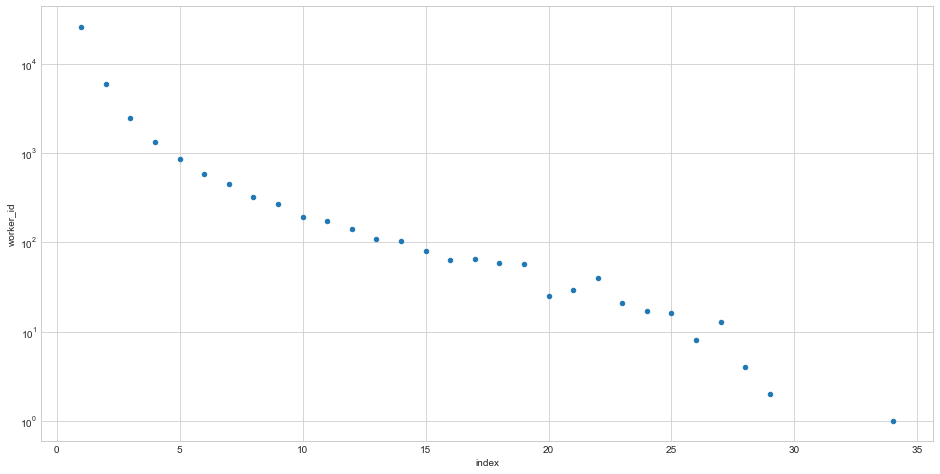

In [12]:
# Plot the above
df['worker_id'].value_counts().value_counts().sort_index().reset_index().plot.scatter(x='index', y='worker_id', logy=True)

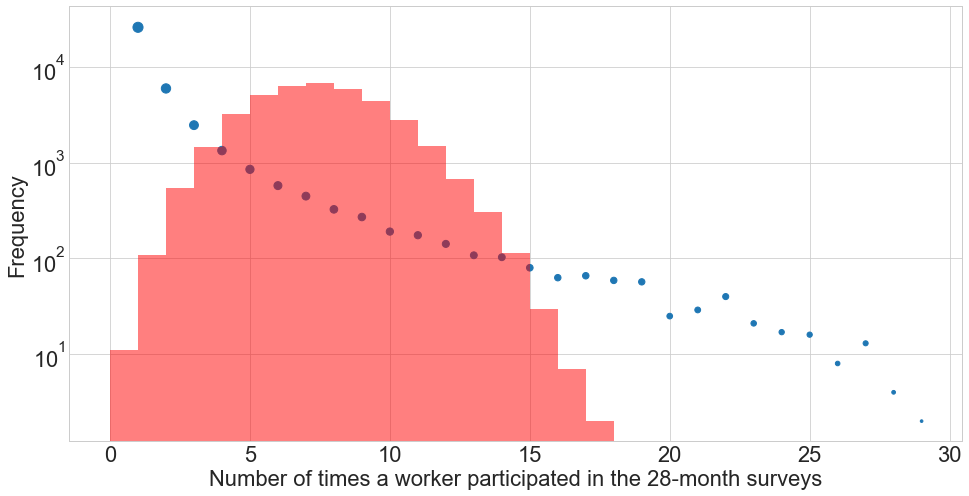

In [252]:
mpl.rc("figure", figsize=(16, 8))
mpl.rcParams.update({'font.size': 22})
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
sns.set_style("whitegrid")

from scipy.stats import binom
N=len(set(df['worker_id']))
p=0.25
rvs = binom.rvs(28, p, size=N)


fig, ax = plt.subplots(1, 1)

cnt = pd.DataFrame(x).drop(34).reset_index()
cnt['index'] = cnt['index'] # /cnt['index'].max()
ax = cnt.plot.scatter(x='index', y='worker_id', logy=True, logx=False, s=10*np.log(cnt['worker_id']), ax = ax)

ax.set_xlabel("Number of times a worker participated in the 28-month surveys")
ax.set_ylabel("Number of workers")

pd.DataFrame(rvs).plot.hist(alpha=0.5, color='r', bins=18, sharex=True, ax=ax)
ax.legend().set_visible(False)

fig.savefig('plots/frequency-counts.pdf', bbox_inches='tight')

(array([  2.23529412e-04,   2.95294118e-03,   1.30000000e-02,
          3.75294118e-02,   8.03176471e-02,   1.26000000e-01,
          1.63647059e-01,   1.73682353e-01,   1.50635294e-01,
          1.11611765e-01,   6.99176471e-02,   4.01764706e-02,
          1.85764706e-02,   7.80000000e-03,   2.75294118e-03,
          8.47058824e-04,   2.58823529e-04,   7.05882353e-05]),
 array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
         11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.]),
 <a list of 1 Patch objects>)

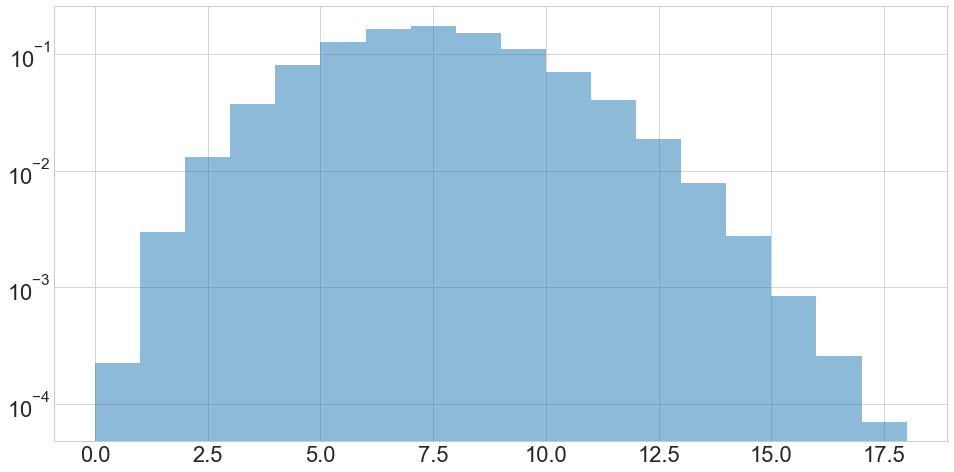

In [57]:


fig, ax = plt.subplots(1, 1)
ax.set_yscale("log")
ax.hist(rvs, normed=True, histtype='stepfilled', alpha=0.5, bins=18)

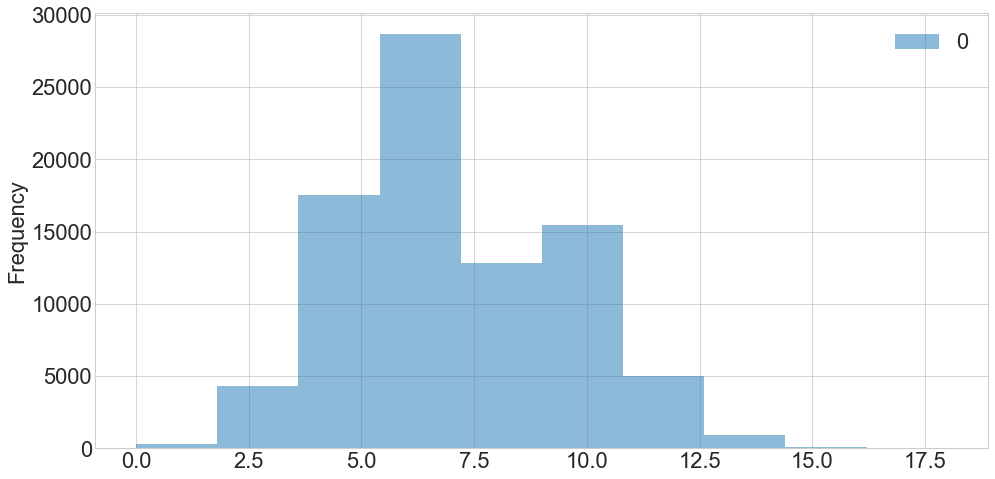

In [81]:
# Let's try to fit directly a beta distribution on the counts:
import scipy
import random

data = []
mx_freq = max(x.index)
for i,v in x.iteritems():
    tmp = [i/mx_freq] * v
    data.extend(tmp)
    
random.shuffle(data)

scipy.stats.beta.fit(data, scale=1, loc=0)

/usr/local/lib/python3.5/dist-packages/scipy/stats/_continuous_distns.py:412: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/usr/local/lib/python3.5/dist-packages/scipy/optimize/minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


(0.49432936940713013,
 23.808792914346984,
 0.029411764705882349,
 1.0094991144457683)

In [99]:
# We can also try a variety of other distributions and find hte best fit.

import numpy as np
import scipy.stats as st
import statsmodels as sm
import warnings
import sys

# Create models from data
def best_fit_distribution(data, bins=27, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Distributions to check
    '''
    DISTRIBUTIONS = [        
        st.alpha,st.anglit,st.arcsine,st.beta,st.betaprime,st.bradford,st.burr,st.cauchy,st.chi,st.chi2,st.cosine,
        st.dgamma,st.dweibull,st.erlang,st.expon,st.exponnorm,st.exponweib,st.exponpow,st.f,st.fatiguelife,st.fisk,
        st.foldcauchy,st.foldnorm,st.frechet_r,st.frechet_l,st.genlogistic,st.genpareto,st.gennorm,st.genexpon,
        st.genextreme,st.gausshyper,st.gamma,st.gengamma,st.genhalflogistic,st.gilbrat,st.gompertz,st.gumbel_r,
        st.gumbel_l,st.halfcauchy,st.halflogistic,st.halfnorm,st.halfgennorm,st.hypsecant,st.invgamma,st.invgauss,
        st.invweibull,st.johnsonsb,st.johnsonsu,st.ksone,st.kstwobign,st.laplace,st.levy,st.levy_l,st.levy_stable,
        st.logistic,st.loggamma,st.loglaplace,st.lognorm,st.lomax,st.maxwell,st.mielke,st.nakagami,st.ncx2,st.ncf,
        st.nct,st.norm,st.pareto,st.pearson3,st.powerlaw,st.powerlognorm,st.powernorm,st.rdist,st.reciprocal,
        st.rayleigh,st.rice,st.recipinvgauss,st.semicircular,st.t,st.triang,st.truncexpon,st.truncnorm,st.tukeylambda,
        st.uniform,st.vonmises,st.vonmises_line,st.wald,st.weibull_min,st.weibull_max,st.wrapcauchy
    ]
    '''
    DISTRIBUTIONS = [        
        st.beta,st.expon,st.exponnorm,st.lognorm,st.lomax,st.powerlaw,st.powerlognorm,st.powernorm
    ]

    # Best holders
    best_distribution = st.norm
    best_params = (0.0, 1.0)
    best_sse = np.inf
    #best_p = np.inf

    # Estimate distribution parameters from data
    for distribution in DISTRIBUTIONS:
        # print(distribution)

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')

                # fit dist to data
                params = distribution.fit(data, fscale=1)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]

                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                #cdf = distribution.cdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))
                aic = 2*len(params) + np.sum ( distribution.logpdf(data, loc=loc, scale=scale, *arg) )
                #ks = st.kstest(y, cdf)

                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax)
                    end
                except Exception:
                    pass

                # identify if this distribution is better
                if best_sse > sse > 0:
                    best_distribution = distribution
                    best_params = params
                    best_sse = sse
                    
                print("{0}, [{1}], {2:3,.2f}, {3:3,.2f}".format(distribution.name, params, sse, aic))

        except Exception as e:
            print(sys.exc_info()[0])
            pass

    return (best_distribution.name, best_params)


In [100]:
# Find best fit distribution
best_fit_name, best_fit_paramms = best_fit_distribution(data, 27)
best_dist = getattr(st, best_fit_name)

print("===================")
print(best_fit_name, best_fit_paramms)

beta, [(0.28944199883015281, 20.923782505927392, 0.029411764705882349, 1)], 175.85, 702,768.17
expon, [(0.029411764667400316, 1)], 473.45, -1,234.29
exponnorm, [(0.026545725078731802, 0.035584897868591536, 1)], inf, -34,889.68
lognorm, [(6.6712518578187749, 0.029411764705882349, 1)], 393.30, 480,084.56
lomax, [(33.630562240013106, 0.02941176470584457, 1)], 34.53, 94,040.13
powerlaw, [(0.063487724556662906, 0.029411764705882349, 1)], 394.88, 872,534.82
powerlognorm, [(4.9382013490525276, 9.4931677970797423, 0.029411764705882349, 1)], 421.75, 733,557.75
powernorm, [(41993416.527364962, 5.5575888108134386, 1)], 430.22, 20,180.11
lomax (33.630562240013106, 0.02941176470584457, 1)


In [28]:
# This is from Chao 1987, equation 10.
# This provides a lower bound on the population
# The assumptions in that paper, for the derivation of this estimator are still not great
# as it assumes that the number of captures (sample periods) is large and that probability
# of capture (propensity) is small. This does not work for the right tail (the heavy hitters)

S = len(set(df['worker_id'])) # 37830
f1 = cnt.loc[0]['worker_id'] # 25070
f2 = cnt.loc[1]['worker_id'] # 5642
f3 = cnt.loc[2]['worker_id'] # 2346
t = len(cnt.index) # 27
m1 = 2 * f2/f1
m2 = 6* f3/f1

N = S + f1**2 / (2*f2) * (( 1 - m1/t)/(1-m2/(t*m1)))
N 

97579.467251384369

In [29]:
# Let's compute the frequency of captures
f = df['worker_id'].value_counts().value_counts()
# f = f.drop(34) # dropping the outlier, this is a data point that should not have existed

In [30]:
# If we assume that the distribution of the propensities follows a Beta distribution,
# then the counts will follow a Beta-Binomial distribution
# See https://en.wikipedia.org/wiki/Beta-binomial_distribution


In [34]:
from scipy.special import gammaln
import numpy as np
def beta_binom_density_ln(k, n, alpha, beta):
    Ad = beta
    Bd = alpha
    An = n - k + beta
    Bn = k + alpha
    num = gammaln(An) + gammaln(Bn) - gammaln(An+Bn)
    den = gammaln(Ad) + gammaln(Bd) - gammaln(Ad+Bd)    
    log = np.log(scipy.special.comb(n,k)) + num - den
    return np.exp(log)

In [35]:
# Using the method of moments, we can try to fit directly:
# See https://en.wikipedia.org/wiki/Beta-binomial_distribution#Point_estimates

t = max(f.index)
distinct = sum ( [f[i] for i in f.index] )
m1 = sum([ i * f[i] for i in f.index]) / distinct
m2 = sum([ i*i * f[i] for i in f.index]) / distinct
# print(m1, m2)
a = (t * m1 - m2) / (( t * (m2/m1) - m1 -1 ) + m1)
print(a)

b = (t - m1) * ( t  - m2/m1) / (( t * (m2/m1) - m1 -1 ) + m1)
print(b)

0.310723814732
4.62224424158


In [36]:
# This is the probability that a user from the population
# is sampled 0 times
# The one beloe is with the parameters estimated using the method of moments
beta_binom_density_ln(0, t, a, b)

0.50645651009099513

In [89]:
t=28

In [90]:
# The one below is estimated through fitting on the MLE estimates for each user
beta_binom_density_ln(0, t, 0.29, 20.9)

0.77931353426477079

In [86]:
distinct

39461

In [87]:
# We now need to estimate the value of f[0], which is the number of workers that we have not seen
# That is equal to  beta_binom_density_ln(0, t, a, b) * N
# The remaining workers that we have seen is distinct = N * ( 1-  beta_binom_density_ln(0, t, a, b))

N  = distinct / (1 - beta_binom_density_ln(0, t, a, b))
print(N)

161382.91251


In [97]:
## These are additional estimates based on the difference of the count vs the expected count 
## for various frequencies

import scipy.special
import math

# Fitting on the MLE estimate for each user
a = 0.29
b = 20.9

# Fitting using Method of Moments for Beta-Binomial
# a = 0.3
# b = 4.6

N_approx = dict()
sm, cn = 0.0, 0.0
for i in f.index:
    #print("==========================")
    # e_fi = scipy.special.comb(t, i) * scipy.special.beta(a+i, t-i+b) / scipy.special.beta(a, b)
    e_fi = beta_binom_density_ln(i, t, a, b)
    # print(st.beta.moment(i, a, b))
    # print(e_fi)
    N_approx[i] = f[i]  / e_fi
    print("N_{i:02d} = {approx:10,.2f}". format(i=i, approx=N_approx[i]))
    sm += N_approx[i]
    cn += 1
    print("Avg = {approx:10,.2f}". format(approx=sm/cn))
    
    

N_01 = 196,685.92
Avg = 196,685.92
N_02 = 121,740.88
Avg = 159,213.40
N_03 = 116,449.79
Avg = 144,958.86
N_04 = 137,948.49
Avg = 143,206.27
N_05 = 187,209.20
Avg = 152,006.86
N_06 = 267,903.88
Avg = 171,323.03
N_07 = 440,879.54
Avg = 209,831.10
N_08 = 685,687.13
Avg = 269,313.10
N_09 = 1,234,549.67
Avg = 376,561.61
N_10 = 1,917,577.53
Avg = 530,663.20
N_11 = 3,954,591.50
Avg = 841,929.41
N_12 = 7,403,152.11
Avg = 1,388,697.97
N_13 = 13,363,432.34
Avg = 2,309,831.38
N_14 = 31,236,956.38
Avg = 4,376,054.60
N_15 = 61,666,906.99
Avg = 8,195,444.76
N_17 = 373,773,434.94
Avg = 31,044,069.14
N_16 = 128,607,936.93
Avg = 36,783,120.19
N_18 = 977,146,799.47
Avg = 89,025,546.82
N_19 = 2,932,201,028.29
Avg = 238,666,361.63
N_22 = 98,193,943,562.84
Avg = 5,136,430,221.69
N_21 = 17,927,570,922.02
Avg = 5,745,532,159.80
N_20 = 4,281,658,209.39
Avg = 5,678,992,434.78
N_23 = 229,620,303,534.49
Avg = 15,415,571,178.25
N_24 = 953,917,924,172.48
Avg = 54,519,835,886.34
N_25 = 5,521,187,220,042.59
Avg = 27

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in true_divide


In [95]:
del N_approx[29]
del N_approx[34]


In [96]:
print(sum(N_approx.values())/len(N_approx))

1.08448131747e+14


In [99]:
sorted(N_approx.values())[13]

31236956.377504054

In [228]:
from scipy.special import logit

## Regression against the demographics:

tmp = df.set_index('worker_id').drop(
    ['hit_answered_date','hit_creation_date','location_city','location_region','date','post_to_completion_secs','time'],axis=1)

# How often do we see each worker?
dem_df = pd.DataFrame(df['worker_id'].value_counts()).merge(
    tmp, 
    how='inner', left_index=True, right_index=True)

dem_df = dem_df [ dem_df.worker_id < 30]
dem_df['propensity'] = logit(dem_df['worker_id']/30)
dem_df['location_country'] = dem_df['location_country'].apply(lambda x : x if x in ['US','IN','CA','GB','PH'] else 'OTHER')
dem_df['age'] = 2017-dem_df['year_of_birth']
dem_df.drop('year_of_birth',axis=1,inplace=True)
dem_df.drop_duplicates(inplace=True)

len(dem_df)

30757

In [250]:
dem_df

,worker_id,gender,household_income,household_size,location_country,marital_status,propensity,age
00008f60155d83e5ac29d6942db234e7,1,male,"$25,000-$39,999",1,OTHER,single,-3.367296,22
0000ceeb6c91d4a1a53fec0de0cc3460,1,female,"$25,000-$39,999",1,US,single,-3.367296,30
0001513be5c5e503366d994625ba169e,6,male,"$40,000-$59,999",3,IN,single,-1.386294,21
0001513be5c5e503366d994625ba169e,6,female,"$10,000-$14,999",4,IN,single,-1.386294,21
0001513be5c5e503366d994625ba169e,6,female,"$15,000-$24,999",5+,IN,married,-1.386294,99
0001513be5c5e503366d994625ba169e,6,female,"Less than $10,000",4,IN,single,-1.386294,22
0001513be5c5e503366d994625ba169e,6,female,"Less than $10,000",4,IN,married,-1.386294,21
0001513be5c5e503366d994625ba169e,6,female,"$10,000-$14,999",4,IN,single,-1.386294,19
0001760b118b1695f042928dc8d6eb5c,1,female,"$60,000-$74,999",1,US,single,-3.367296,33
000314db2adbfc1680937b7a9a7b0564,7,male,"$15,000-$24,999",2,OTHER,cohabitating,-1.189584,24


In [230]:
dem_df.dtypes

worker_id              int64
gender                object
household_income    category
household_size      category
location_country      object
marital_status      category
propensity           float64
age                    int64
dtype: object

In [244]:
import math
import statsmodels.formula.api as sm

formula = "propensity ~ C(location_country) + C(gender) +  C(household_income)+ C(household_size) + C(marital_status) + age"

result = sm.ols(formula=formula, data=dem_df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             propensity   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     76.89
Date:                Tue, 08 Aug 2017   Prob (F-statistic):               0.00
Time:                        10:17:38   Log-Likelihood:                -47229.
No. Observations:               30757   AIC:                         9.451e+04
Df Residuals:                   30730   BIC:                         9.474e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                   -2.6532      1.233     -2.152      0.031      -5.070      -0.237
C(location_country)[T.GB]                   -0.0165      0.069     -0.240      0.811      -0.151       0.118
C(location_country)[T.IN]                    1.1164      0.049     22.883      0.000       1.021       1.212
C(location_country)[T.OTHER]                 0.3876      0.050      7.800      0.000       0.290       0.485
C(location_country)[T.PH]                    0.3468      0.092      3.757      0.000       0.166       0.528
C(location_country)[T.US]                    0.6444      0.046     14.021      0.000       0.554       0.735
C(gender)[T.female]                          1.1704      1.125      1.041      0.298      -1.034       3.375
C(gender)[T.male]                            1.1708      1.125      1.041      0.298      -1.033       3.375
C(household_income)[T.$100,000 or more]     -0.0984      0.031     -3.208      0.001      -0.158      -0.038
C(household_income)[T.$15,000-$24,999]       0.0309      0.026      1.174      0.240      -0.021       0.082
C(household_income)[T.$25,000-$39,999]       0.0619      0.025      2.431      0.015       0.012       0.112
C(household_income)[T.$40,000-$59,999]       0.0874      0.026      3.383      0.001       0.037       0.138
C(household_income)[T.$60,000-$74,999]       0.0266      0.028      0.939      0.348      -0.029       0.082
C(household_income)[T.$75,000-$99,999]      -0.0137      0.029     -0.467      0.641      -0.071       0.044
C(household_income)[T.Less than $10,000]    -0.0160      0.026     -0.610      0.542      -0.067       0.035
C(household_size)[T.2]                      -0.0630      0.023     -2.799      0.005      -0.107      -0.019
C(household_size)[T.3]                      -0.0270      0.023     -1.170      0.242      -0.072       0.018
C(household_size)[T.4]                      -0.0471      0.024     -1.973      0.048      -0.094      -0.000
C(household_size)[T.5+]                     -0.1063      0.025     -4.173      0.000      -0.156      -0.056
C(marital_status)[T.cohabitating]           -1.4399      0.503     -2.861      0.004      -2.426      -0.454
C(marital_status)[T.divorced]               -1.6341      0.503     -3.246      0.001      -2.621      -0.647
C(marital_status)[T.engaged]                -1.5432      0.504     -3.064      0.002      -2.530      -0.556
C(marital_status)[T.married]                -1.3072      0.503     -2.599      0.009      -2.293      -0.321
C(marital_status)[T.separated]              -0.2836      0.821     -0.345      0.730      -1.893       1.326
C(marital_status)[T.single]                 -1.3850      0.503     -2.753      0.006      -2.371      -0.399
C(marital_status)[T.widowed]   

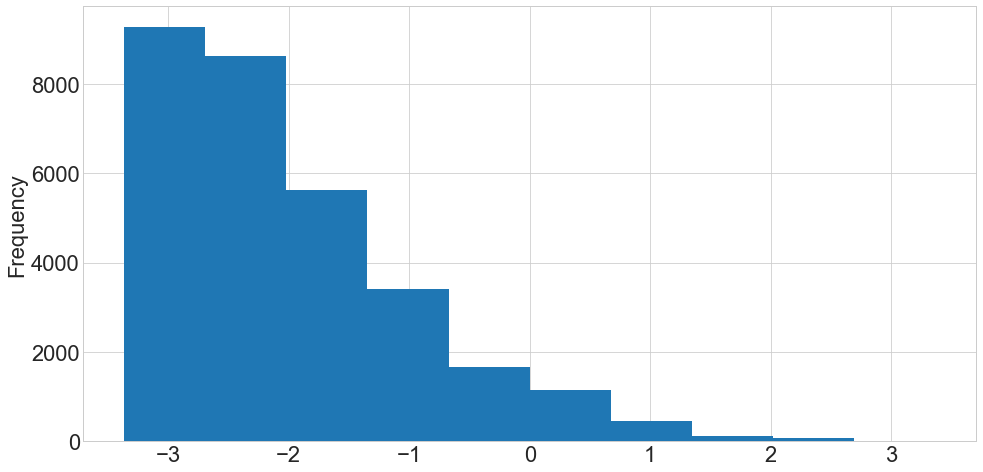

In [225]:
dem_df.propensity.plot.hist()

In [240]:
from statsmodels.genmod.generalized_estimating_equations import GEE
from statsmodels.genmod.cov_struct import (Exchangeable,
    Independence,Autoregressive)
from statsmodels.genmod.families import Poisson

fam = Poisson()
ind = Independence()
model1 = GEE.from_formula(formula, data=dem_df, cov_struct=ind, family=fam)
result1 = model1.fit()
result1.summary()

TypeError: from_formula() missing 1 required positional argument: 'groups'

In [241]:
!sudo pip3 install -U pymc3

The directory '/home/ubuntu/.cache/pip/http' or its parent directory is not owned by the current user and the cache has been disabled. Please check the permissions and owner of that directory. If executing pip with sudo, you may want sudo's -H flag.
The directory '/home/ubuntu/.cache/pip' or its parent directory is not owned by the current user and caching wheels has been disabled. check the permissions and owner of that directory. If executing pip with sudo, you may want sudo's -H flag.
    100% |████████████████████████████████| 1.2MB 833kB/s ta 0:00:01
    100% |████████████████████████████████| 3.1MB 493kB/s eta 0:00:01
Requirement already up-to-date: tqdm>=4.8.4 in /usr/local/lib/python3.5/dist-packages (from pymc3)
    100% |████████████████████████████████| 4.7MB 320kB/s eta 0:00:01
Requirement already up-to-date: matplotlib>=1.5.0 in /usr/local/lib/python3.5/dist-packages (from pymc3)
Requirement already up-to-date: pandas>=0.18.0 in /usr/local/lib/python3.5/dist-packages (from

In [242]:
import pymc3 as pm

with pm.Model() as model:
    pm.glm.GLM.from_formula(formula=formula, data=dem_df, family=pm.glm.families.NegativeBinomial())

    # Old initialization
    # start = pm.find_MAP(fmin=optimize.fmin_powell)
    # C = pm.approx_hessian(start)
    # trace = pm.sample(4000, step=pm.NUTS(scaling=C))

    trace = pm.sample(2000, njobs=2)

Auto-assigning NUTS sampler...
Initializing NUTS using ADVI...
Average Loss = inf:  19%|█▊        | 37298/200000 [06:06<25:44, 105.36it/s]
Convergence archived at 37300
Interrupted at 37,300 [18%]: Average Loss = nan
Process ForkPoolWorker-1:
Traceback (most recent call last):
TypeError: ('The following error happened while compiling the node', CGemv{inplace}(AllocEmpty{dtype='float64'}.0, TensorConstant{1.0}, TensorConstant{[[  1.   0.. 0.  39.]]}, MakeVector{dtype='float64'}.0, TensorConstant{0.0}), '\n', 'The numpy.ndarray object is not aligned. Theano C code does not support that.', 'object buffer<memory at 0x7f2895938c18>', 'object shape', (30757, 27), 'object strides', (216, 8), 'object dtype', dtype('float64'))
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.5/multiprocessing/pool.py", line 1

KeyboardInterrupt: 